In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Read the data**

In [2]:
df = pd.read_csv('./data/winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.shape

(6497, 13)

<font size="4">The data has 6497 rows and 13 columns</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

<font size="4">Few columns have missing values, the columns "fixed acidity" has the highest number of missing values</font>

## **Replace missing values**

<font size="4">We will replace the missing the values with the column mean</font>

In [7]:
missing_val_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]

In [8]:
for col in missing_val_cols:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)
    

In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<font size="4">Now, there are no more missing values</font>

## **Data exploration**

In [10]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<font size="4">We have an unbalanced dataset, more number of white wine than red </font>

In [11]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<font size="4">The dataset is unbalanced with respect to the wine quality as well.</font>

## **Data Viz**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

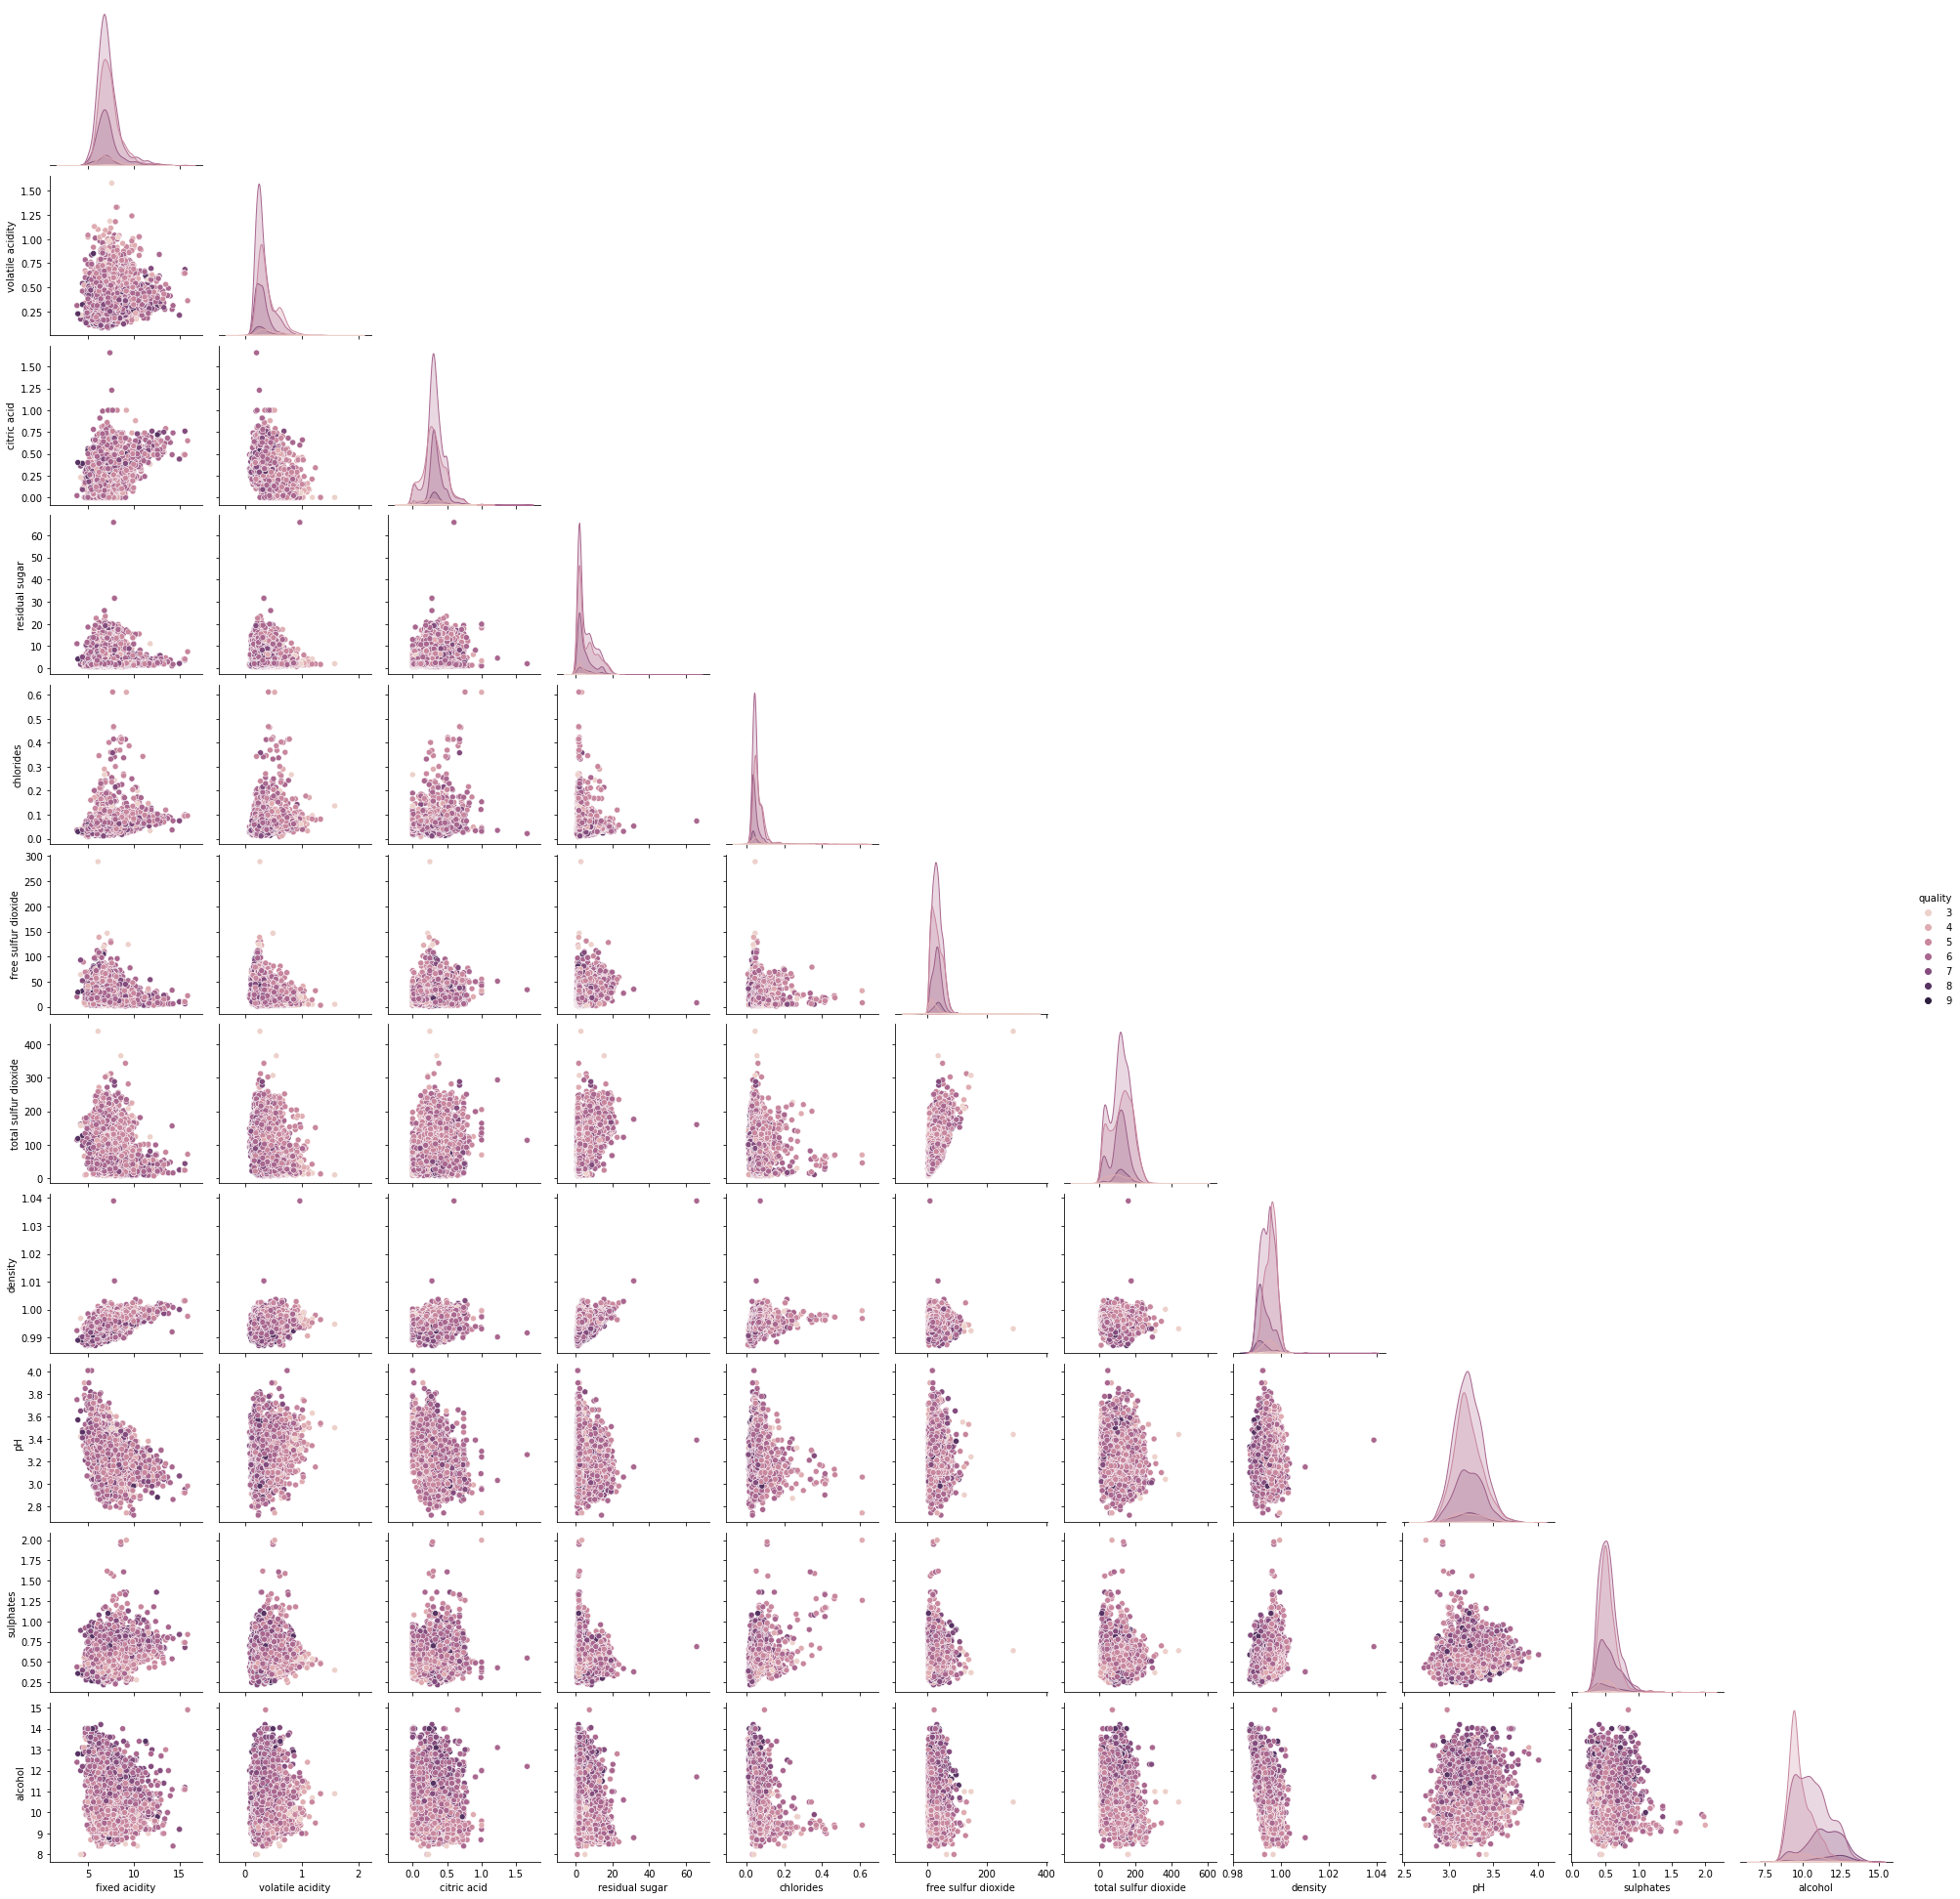

In [13]:
sns.pairplot(df, hue='quality', corner=True)

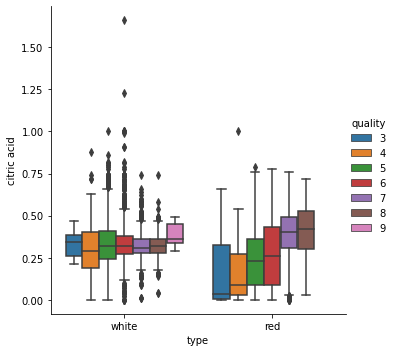

In [14]:
sns.catplot(x="type", y="citric acid", kind="box", hue="quality", data=df)

<font size="4">White wine has many outliers for quality 6</font>

<AxesSubplot:xlabel='quality', ylabel='count'>

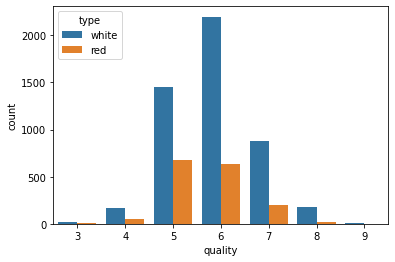

In [15]:
sns.countplot(x="quality", hue="type", data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

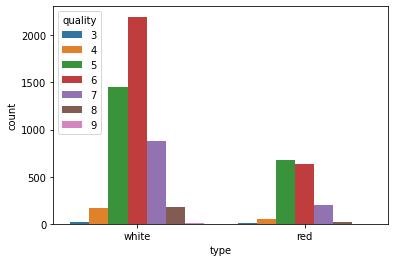

In [16]:
sns.countplot(x="type", hue="quality", data=df)

In [17]:
corr = df.corr()

<AxesSubplot:>

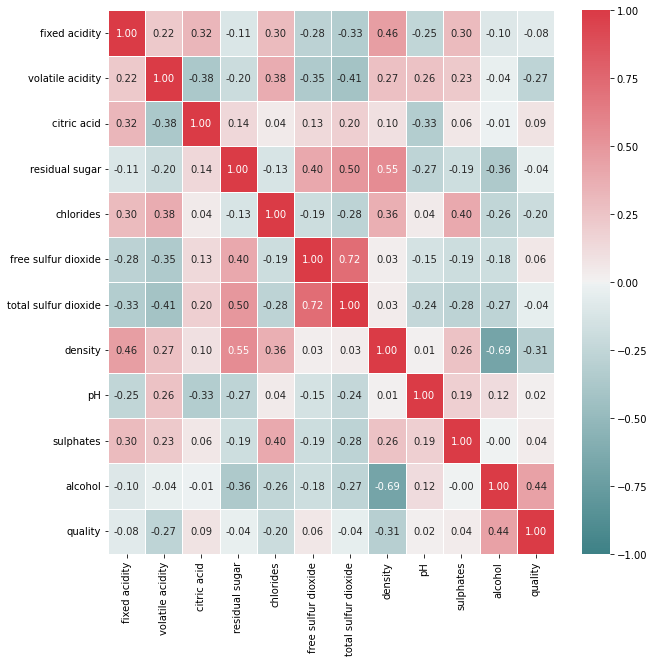

In [18]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True), vmin=-1, vmax=1, linewidths=.5, fmt=".2f")

<font size="4">```Density``` and ```alcohol``` are highly negatively correlated and ```free sulfur dioxide``` and ```total sulfur dioxide``` are highly positively correlated</font>

<font size="4">Since the column ```type``` of object type, we convert it into integer by assigning values 0 and 1 to wine types</font>

In [19]:
df = pd.get_dummies(df, drop_first=True)

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


<font size="4">Rename the column ```type_white``` to ```wine_type```</font>

In [21]:
df = df.rename(columns={"type_white": "wine_type"})

<font size="4">Since, we had an unbalanced dataset with respect to wine quality, we divide the qualities into two  groups - 1 (for wine quality 7, 8, 9) and 0 (for 6 and below)</font>

In [22]:
df["wine_quality"] = [1 if x>6 else 0 for x in df.quality]

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


<font size="4">Store the label in ```y```</font>

In [24]:
y = df["wine_quality"]

In [25]:
y.value_counts()

0    5220
1    1277
Name: wine_quality, dtype: int64

In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: wine_quality, Length: 6497, dtype: int64

<font size="4">Store the feature columns in ```x```</font>

In [27]:
x = df.drop(["quality", "wine_quality"], axis=1)

In [28]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


## **Model Training**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [83]:
log = pd.DataFrame(columns=["model", "accuracy", "enhanced_data"])
log['enhanced_data'] = log['enhanced_data'].astype(bool)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [53]:
from enhance_data import enhance_data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


transformer = ColumnTransformer([
    ('onehotencode categories', OneHotEncoder(), ['wine_type']),
    ('nor normally distributed', MinMaxScaler(), ['fixed acidity',
                                                  'volatile acidity',
                                                  'citric acid',
                                                  'residual sugar',
                                                  'chlorides',
                                                  'free sulfur dioxide',
                                                  'total sulfur dioxide',
                                                  'density',
                                                  'pH',
                                                  'sulphates',
                                                  'alcohol'])], 
    remainder='drop')
    
# chain transformer and imputation
pipeline = Pipeline([('transform', transformer)])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)

#y_train = y_train.values


fitting new wasserstein generator on smaller data
Epoch   1 | ET 0.07 min | Avg Losses >> G/D  -0.07/220.41 [D-Real:   0.22 D-Fake:   0.07]
Epoch   2 | ET 0.15 min | Avg Losses >> G/D  -0.11/ 10.88 [D-Real:  -0.02 D-Fake:   0.11]
Epoch   3 | ET 0.24 min | Avg Losses >> G/D  -0.13/  6.62 [D-Real:  -0.10 D-Fake:   0.13]
Epoch   4 | ET 0.32 min | Avg Losses >> G/D  -0.21/  5.71 [D-Real:  -0.16 D-Fake:   0.21]
Epoch   5 | ET 0.39 min | Avg Losses >> G/D  -0.26/  4.95 [D-Real:  -0.19 D-Fake:   0.26]
Epoch   6 | ET 0.47 min | Avg Losses >> G/D  -0.32/  3.89 [D-Real:  -0.24 D-Fake:   0.32]
Epoch   7 | ET 0.55 min | Avg Losses >> G/D  -0.35/  2.87 [D-Real:  -0.27 D-Fake:   0.35]
Epoch   8 | ET 0.61 min | Avg Losses >> G/D  -0.38/  1.96 [D-Real:  -0.29 D-Fake:   0.38]
Epoch   9 | ET 0.68 min | Avg Losses >> G/D  -0.39/  1.34 [D-Real:  -0.33 D-Fake:   0.39]
Epoch  10 | ET 0.74 min | Avg Losses >> G/D  -0.39/  0.92 [D-Real:  -0.33 D-Fake:   0.39]
Epoch  11 | ET 0.81 min | Avg Losses >> G/D  -0.3

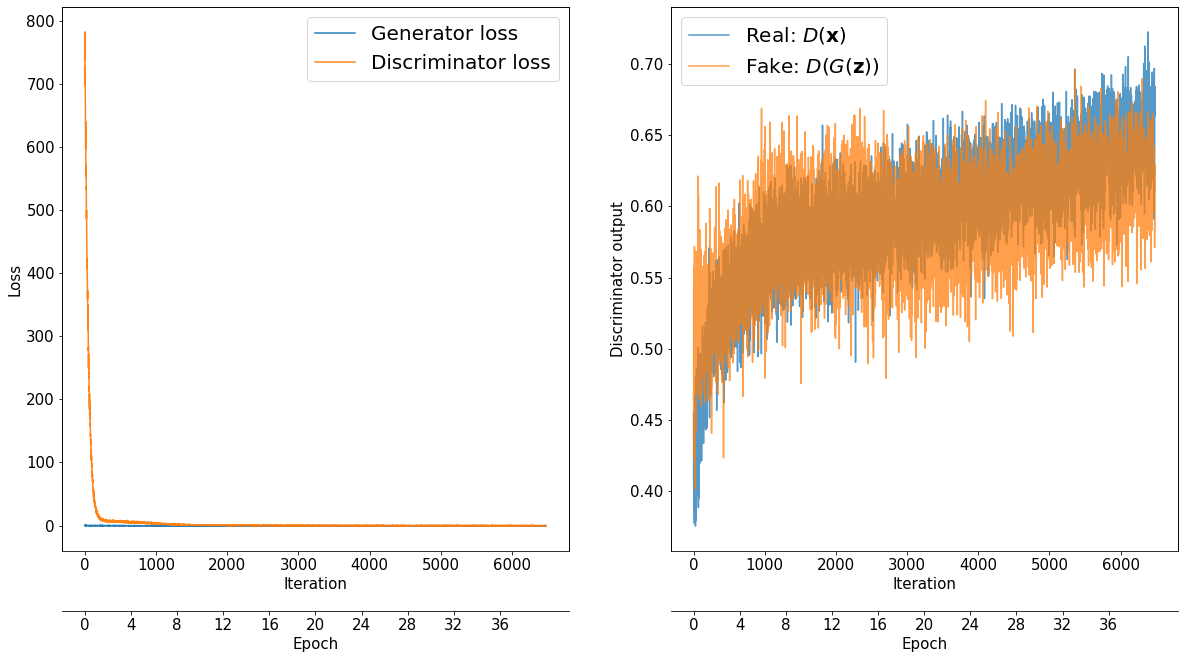

In [55]:
enh = enhance_data(X_train, y_train, force_generator=True, synthetic_share=.2, wasserstein=True)

<font size="4">**Logistic Regeression**</font>

In [85]:
clf = LogisticRegression(solver='liblinear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_train, y_train)

score = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[983,  64],
       [172,  81]])

# logreg with enhanced data

In [86]:
log = log.append({"model": "logistic regression", "accuracy": score, "enhanced_data": False}, ignore_index=True)

In [87]:
clf = LogisticRegression(solver='liblinear')

clf.fit(enh['x_train_processed'], enh['y_train'])

y_pred = clf.predict(X_test)

clf.score(X_train, y_train)

score = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[845, 202],
       [ 98, 155]])

In [88]:
log = log.append({"model": "logistic regression", "accuracy": score, "enhanced_data": True}, ignore_index=True)

<font size="4">**C-support Vector Classification**</font>

In [89]:
from sklearn.svm import SVC

In [90]:
model = SVC(kernel="rbf",C=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)

In [91]:
log = log.append({"model": "SVC", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# svc with enhanced data

In [92]:
model = SVC(kernel="rbf",C=1)

model.fit(enh['x_train_processed'], enh['y_train'])

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)

In [93]:
confusion_matrix(y_test, y_pred)

array([[1040,    7],
       [ 232,   21]])

In [94]:
log = log.append({"model": "SVC", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [95]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.769231,True
2,SVC,0.821538,False
3,SVC,0.816154,True


<font size="4">**Random Forest Classifier**</font>

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Random Forest", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# RF with enhanced data

In [98]:
clf = RandomForestClassifier(random_state = 1)
clf.fit(enh['x_train_processed'], enh['y_train'])
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Random Forest", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [99]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.769231,True
2,SVC,0.821538,False
3,SVC,0.816154,True
4,Random Forest,0.817692,False
5,Random Forest,0.819231,True


<font size="4">**Decision Tree Classifier**</font>

In [100]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Decision tree", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# decision tree with enhanced data

In [101]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf.fit(enh['x_train_processed'], enh['y_train'])
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Decision tree", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [102]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.769231,True
2,SVC,0.821538,False
3,SVC,0.816154,True
4,Random Forest,0.817692,False
5,Random Forest,0.819231,True
6,Decision tree,0.768462,False
7,Decision tree,0.744615,True


<font size="4">**K nearest neighbour**</font>

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "K nearest neighbours", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# knn with enhanced data

In [104]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(enh['x_train_processed'], enh['y_train'])
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "K nearest neighbours", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [105]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.769231,True
2,SVC,0.821538,False
3,SVC,0.816154,True
4,Random Forest,0.817692,False
5,Random Forest,0.819231,True
6,Decision tree,0.768462,False
7,Decision tree,0.744615,True
8,K nearest neighbours,0.802308,False
9,K nearest neighbours,0.802308,True


<font size="4">**Gaussian Naive Bayes**</font>

In [107]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "GaussianNB", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# naive bayes with enhanced data

In [108]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(enh['x_train_processed'], enh['y_train'])
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "GaussianNB", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [109]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.769231,True
2,SVC,0.821538,False
3,SVC,0.816154,True
4,Random Forest,0.817692,False
5,Random Forest,0.819231,True
6,Decision tree,0.768462,False
7,Decision tree,0.744615,True
8,K nearest neighbours,0.802308,False
9,K nearest neighbours,0.802308,True


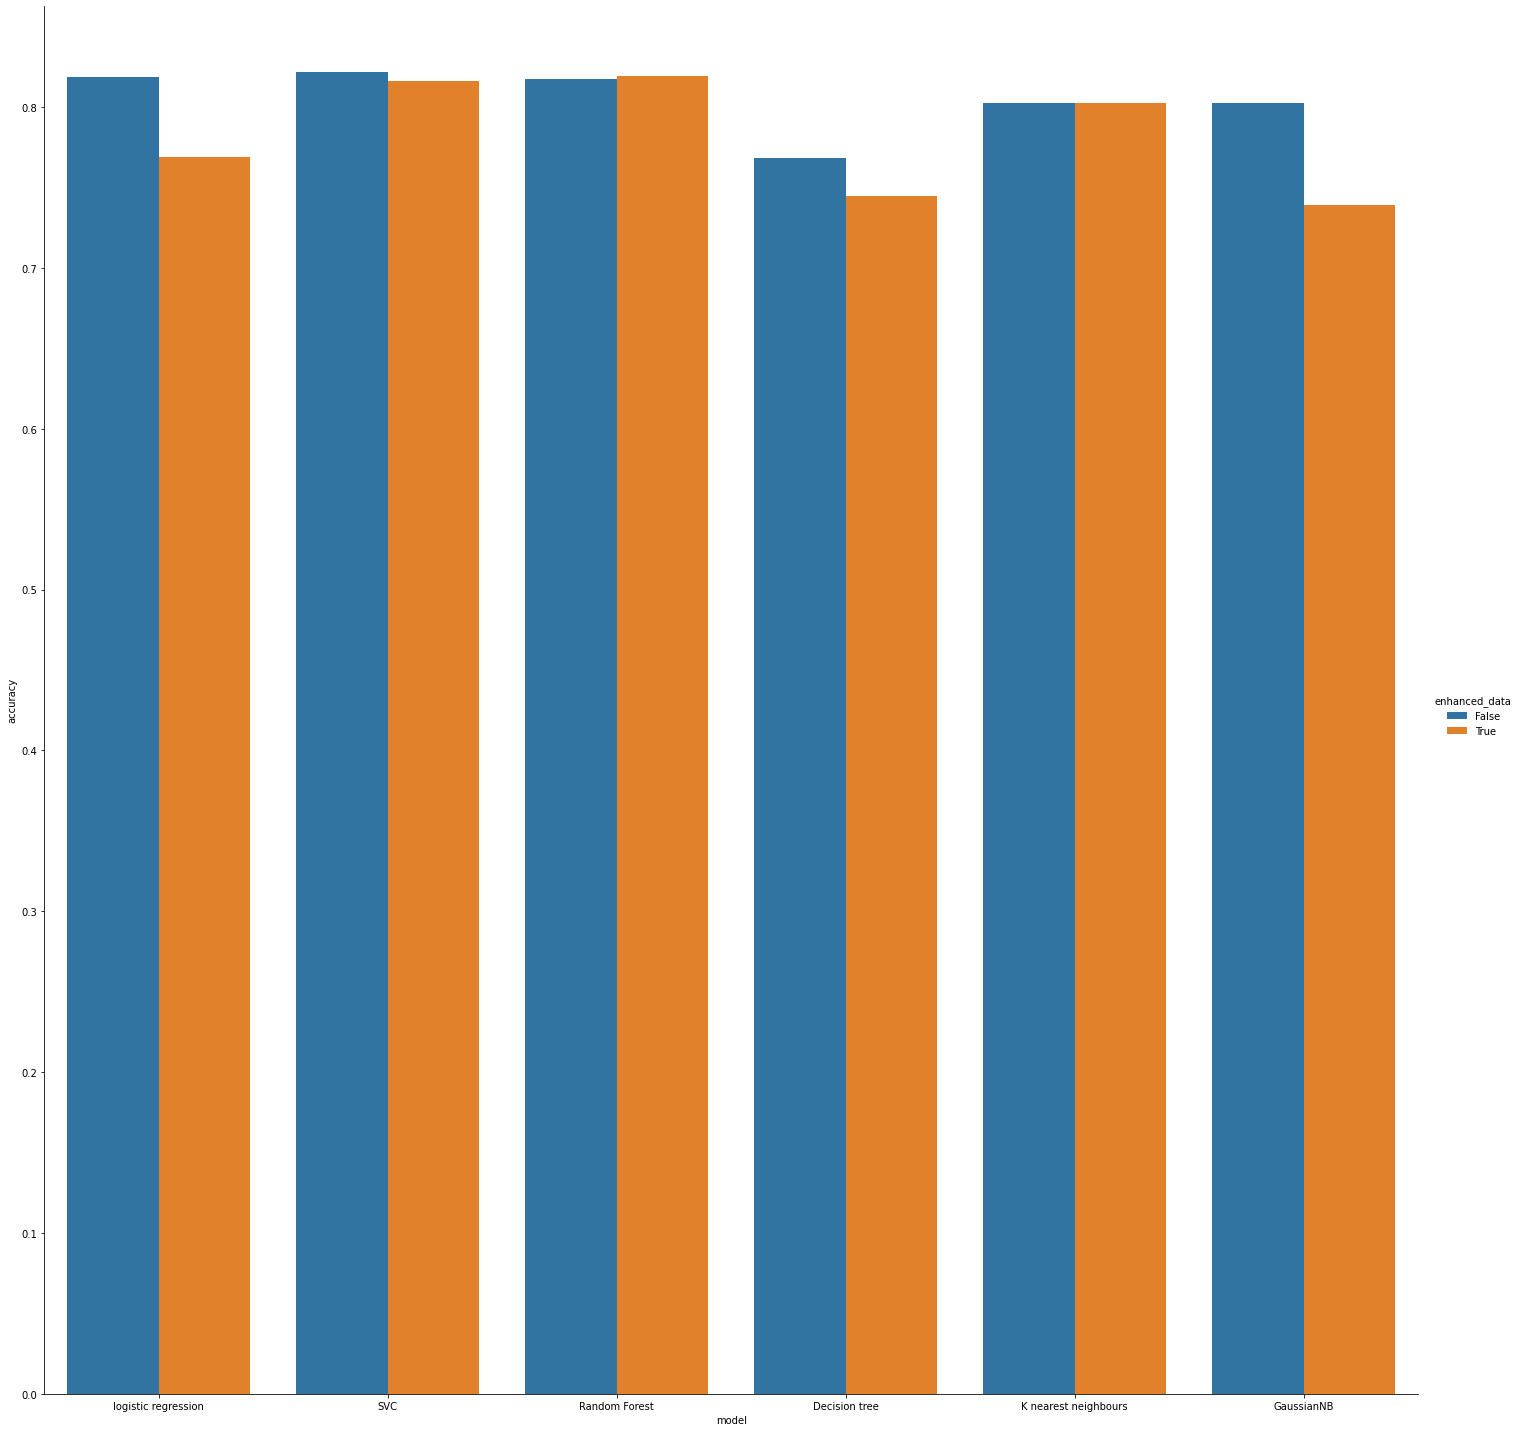

In [113]:
import seaborn as sns


sns.catplot(
    data=log,
    x='model',
    y='accuracy',
    hue='enhanced_data',
    kind='bar',
    height=20
)

#plt.figure(figsize=(10, 5))
#plt.bar(log["model"], log["accuracy"], width=0.4)
#plt.xlabel("Classifier")
#plt.ylabel("accuracy")
#for index, value in enumerate(log["accuracy"]):
#    plt.text(index,value, str(round(value, 2)))
#plt.show()

<font size="5">**Random Forest has shown the best result (accuracy score = 88%) in comparison to other classifiers**</font>

<font size="5">In the next version, I will try to balance the dataset using SMOTEENN and see if there's any improvement in accuracy scores.</font>

<font size="4">If you found this helpful, please feel free to upvote 👍</font>